<a href="https://colab.research.google.com/github/Aishwaryaaaaaaaaaa/CodeClauseTask2-Sentiment_Analysiss/blob/main/CodeClauseTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA SCIENCE INTERNSHIP PROGRAM  - CodeClause**

##Task 2

**AMAZON REVIEW SENTIMENT ANALYSIS**

##About The Project

  In this project , i have used several libraries such as NumPy , Pandas , Matplotlib and Seaborn to analyze the data.

The project involve several processes such as Data Pre-processing ,Distribution Of classes , Exploratory Data Analysis , Visualisation through heatmaps , plotting word cloud , stemming , splitting the data into training and testing data.

After preprocessing the data , I used Logistic Regression Algorithm to build a predictive model.The model was trained using the training data and then i evaluated its performance on the test data.

Overall , this project aimed to analyse the positive or negative review out of a dataset and build a predictive model for detecting positive or negative review.



Github link :-

#Data Exploration

In this , we utilized the amazon review dataset from kaggle.


##Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [3]:
# Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [4]:
## Download stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Data Pre-processing

In [28]:
#importing dataset
df=pd.read_csv('Twitter_Data.csv.zip')

In [29]:
#checking the shapes and columns of dataset
df.shape
df.columns

Index(['clean_text', 'category'], dtype='object')

In [30]:
#summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [31]:
#This is how the dataset looks like
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [32]:
#checking the statistical information of the dataset
df.describe()


,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [33]:
#Text Word startistics: min.mean, max and interquartile ra
clean_text_length = df.clean_text.str.split().str.len()
clean_text_length.describe()

count    162976.000000
mean         20.080417
std          10.879498
min           0.000000
25%          11.000000
50%          18.000000
75%          29.000000
max          52.000000
Name: clean_text, dtype: float64

##Distribution Of Classes

-1:Negative
0:Neutral
1:Positive
Distribution of category:
 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64


Text(0.5, 1.0, 'Ratings')

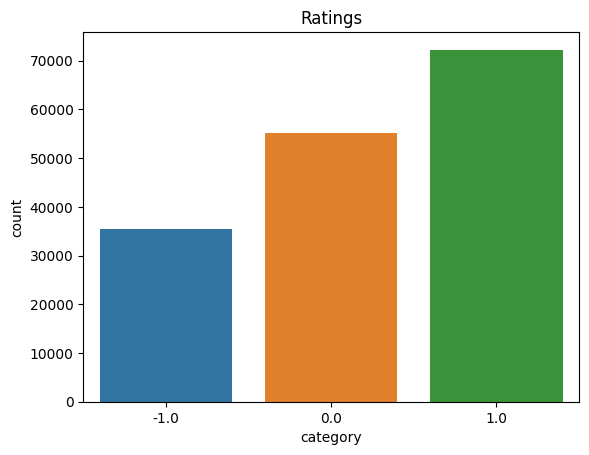

In [34]:
sns.countplot(x="category", data=df)
print("-1:Negative")
print("0:Neutral")
print("1:Positive")
print("Distribution of category:")
print(df.category.value_counts());
plt.title('Ratings')

##Exploratory Data Analysis

In [35]:
#checking null values
df.isnull()

,clean_text,category
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
162975,False,False
162976,False,False
162977,False,False
162978,False,False


In [36]:
#counting the null values
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [37]:
# Checking the % of Null values and duplicate values if any
print(df.isnull().sum()/len(df)*100)

clean_text    0.002454
category      0.004295
dtype: float64


<Axes: >

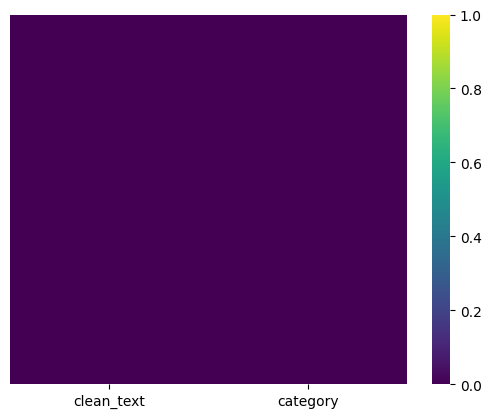

In [38]:
#Visualising to see if there is any null value or not through heatmap
sns.heatmap(df.isnull() , yticklabels = False , cbar = True , cmap='viridis')

In [39]:
df['clean_text'].value_counts()

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples                   1
according assam bjp candidate palab lushan das above years age india should get retired from politics also according him modi also takes retired and added that young generation should come for works                               1
lok sabha election 2019 live modi has ignored his own constituency varanasi says priyanka gandhi                                                                                                                                     1
arnab asks modi about opposition saying asat announcement was violation poll code modi says that government can power can make mistakes but congress who has been power for long time should have considered these allegations       1
mrintelligent was claiming that they have attached more than what its worth 

In [40]:
# Drooping Null values from the dataset
df.dropna(inplace=True)

In [41]:
# Dataset shape after dropping null rows
df.shape

(162969, 2)

In [42]:
# There are 5 unique Sentiment
df['category'].value_counts()

 1.0    72249
 0.0    55211
-1.0    35509
Name: category, dtype: int64

In [43]:
category_count = df['category'].value_counts().reset_index()
category_count.columns=['category','count']
category_count


,category,count
0,1.0,72249
1,0.0,55211
2,-1.0,35509


In [44]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


Text(0, 0.5, 'Count')

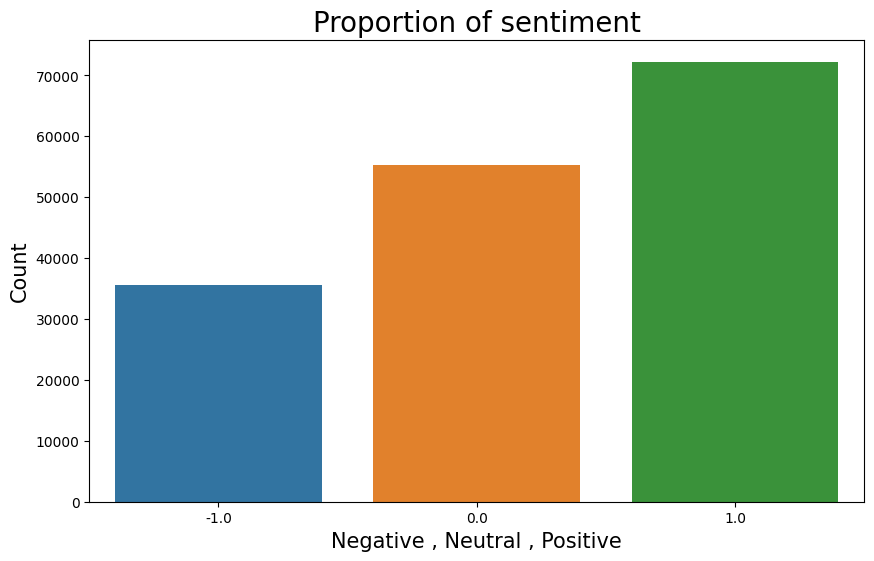

In [45]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="category", y= 'count', data=category_count)
ax.set_title('Proportion of sentiment', fontsize=20)
ax.set_xlabel("Negative , Neutral , Positive",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

In [46]:
#cleaning data
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [47]:
#removing punctuation
def remove_punc(text):
  ''' function to remove punctuation'''

  import string

  # replacing the punctuations with no space
  translator = str.maketrans('','', string.punctuation)

  # return the text stripped of punctuation marks
  return text.translate(translator)

In [48]:
df['clean_text']=df['clean_text'].apply(remove_punc)

In [49]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


##Stemming

In [54]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)


In [56]:
df['clean_text']= df['clean_text'].apply(stemming)

In [58]:
df.head()

,clean_text,category
0,when modi promis “minimum govern maximum gover...,-1.0
1,talk all the nonsens and continu all the drama...,0.0
2,what did just say vote for modi welcom bjp tol...,1.0
3,ask his support prefix chowkidar their name mo...,1.0
4,answer who among these the most power world le...,1.0


##Model Training

In [59]:
## defining Independent variable
X = df.clean_text

## defining dependent variable
y = df.category


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [62]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((130375,), (130375,), (32594,), (32594,))

##Model : Logistic Regression

In [64]:
tvec = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [65]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier',LR)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [66]:
#model prediction
y_pred = model.predict(X_test)

##Evaluation

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [68]:
print('Accuracy :' ,accuracy_score(y_pred,y_test))
print('Precision :', precision_score(y_pred,y_test, average='weighted'))
print('Recall :', recall_score(y_pred,y_test, average='weighted'))

Accuracy : 0.8775848315640915
Precision : 0.881412391435215
Recall : 0.8775848315640915


##Trying on New tweets

In [69]:
Tweet = ['hospitals are good', 'boy is sad',
         'he fell sick', 'he is not satisfied',
        'he is angry with his behaviour', 'taste of food bad', 'snacks are good']
result = model.predict(Tweet)

print(result)

[ 1. -1. -1.  0.  0. -1.  1.]


# **Thank You!!!**